### Problem 4

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
xMin =-1
xMax =1
yMin = -1
yMax =1

In [3]:
def generateRandomDataset(numberOfPoints):
    #generates a set of points inside de regino [xMin,xMax]x[yMin,yMax]
    dataset = []
    points_x= []
    points_y= []
    while numberOfPoints >0:
        x = random.uniform(xMin, xMax)
        y = random.uniform(yMin, yMax)
        while y == 0:
            y = random.uniform(yMin, yMax)
        points_x.append(x)
        points_y.append(y)
        numberOfPoints -= 1;
    dataset.append(points_x)
    dataset.append(points_y)
    return dataset



def generateRandomLine():
    a = random.uniform(xMin, xMax)
    b = random.uniform(yMin, yMax)
    c = random.uniform(yMin, yMax)
    return [a,b,c]


def evaluateDataset(weights, dataset):
    #evaluates points that are accepted or denied by the target function
    acceptedPoints = []
    acceptedPoints_x = []
    acceptedPoints_y = []
    
    deniedPoints = []
    deniedPoints_x = []
    deniedPoints_y = []
    
    points_x, points_y = dataset
  
    for i in range(len(points_x)):
        if evaluatePoint(points_x[i],points_y[i], weights)[0] == 1:
            acceptedPoints_x.append(points_x[i])
            acceptedPoints_y.append(points_y[i])
        else:
             if evaluatePoint(points_x[i],points_y[i], weights)[0] == -1:
                deniedPoints_x.append(points_x[i])
                deniedPoints_y.append(points_y[i])
            
    acceptedPoints.append(acceptedPoints_x)
    acceptedPoints.append(acceptedPoints_y)
    deniedPoints.append(deniedPoints_x)
    deniedPoints.append(deniedPoints_y)
    
    return [acceptedPoints, deniedPoints]


    
    

In [4]:
#Perceptron Algorithm

def evaluatePoint(point_x, point_y, weights):
    value = point_x*weights[0] + point_y*weights[1] +weights[2]
    if(value >0):
        return [1, value]
    else:
        return [-1, value]
        
def checkPoints(dataset, targetFunction, hypothesisFunction):
    misclassifiedPoints = []
    points_x, points_y = dataset
    for i in range(len(points_x)):
        valueTarget = evaluatePoint(points_x[i],points_y[i], targetFunction)
        valueHypothesis = evaluatePoint(points_x[i],points_y[i], hypothesisFunction)
        if not valueTarget[0] == valueHypothesis[0]:
            misclassifiedPoints.append([points_x[i],points_y[i], valueTarget, valueHypothesis])
    return misclassifiedPoints



def perceptron(dataset, targetFunction):
    weights = [0]*3
    misclassifiedPoints = checkPoints(dataset, targetFunction, weights)
    numberOfIterations = 0
    while len(misclassifiedPoints) > 0:
        # print  misclassifiedPoints
        pickPoint = random.randint(0,len(misclassifiedPoints))
        point_x, point_y, targetValues, hypothesisValues  = misclassifiedPoints[pickPoint]
        sign = targetValues[0]
        weights[0] +=  point_x*sign
        weights[1] +=  point_y*sign
        weights[2] +=  sign
        misclassifiedPoints = checkPoints(dataset, targetFunction, weights)
        numberOfIterations += 1
        
    return [weights, numberOfIterations]

def error(target, hypothesis, testSet = 100):
    
    points_x, points_y = generateRandomDataset(testSet)
    numberOfmisclassifiedPoints = 0
    
    for i in range(len(points_x)):
        valueTarget = evaluatePoint(points_x[i],points_y[i], target)[0]
        valueHypothesis = evaluatePoint(points_x[i],points_y[i], hypothesis)[0]
        if not valueTarget == valueHypothesis:
            numberOfmisclassifiedPoints += 1
    
    return (float(numberOfmisclassifiedPoints)/float(testSet))
    
        

In [5]:
def getSlopeAndInterception(weigths):
    line = [0]*2
    line[0] = -weigths[0]/weigths[1]
    line[1] = -weigths[2]/weigths[1]
    return line

In [6]:
dataset= generateRandomDataset(100)

In [7]:
target = generateRandomLine()
datasetEvaluatedByTarget = evaluateDataset(target, dataset)

In [8]:
hypothesis, iterations = perceptron(dataset, target)

In [11]:
datasetEvaluatedByHypothesis = evaluateDataset(hypothesis, dataset)

In [12]:
targetLine = getSlopeAndInterception(target)
hypothesisLine = getSlopeAndInterception(hypothesis)

#### Plotting data

In [50]:
def plot(datasetEvaluatedByTarget, targetLine, hypothesisLine, iterations):
    ls = np.linspace(-1,1)
    plt.figure(figsize = (10,10))
    plt.plot(datasetEvaluatedByTarget[0][0],datasetEvaluatedByTarget[0][1],"b+")
    plt.plot(datasetEvaluatedByTarget[1][0],datasetEvaluatedByTarget[1][1],"r+")
    plt.plot(ls,targetLine[0]*ls+targetLine[1], label ="Target Function", color="g")
    plt.plot(ls,hypothesisLine[0]*ls+hypothesisLine[1], label ="Hypothesis Function", color="k")
    plt.axis([-1,1,-1,1])
    plt.title(str(iterations) + " iterations", fontsize=20)
    plt.legend()

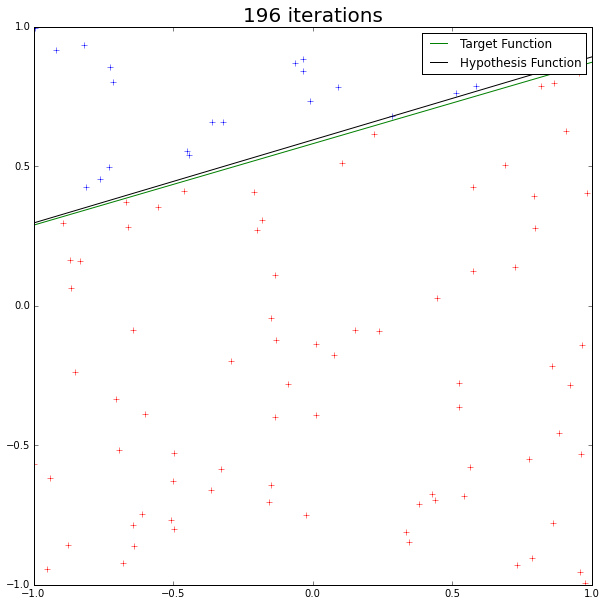

In [14]:
plot(datasetEvaluatedByTarget, targetLine, hypothesisLine, iterations)

In [15]:
def mean(list_):
    size = len(list_)
    total = 0
    for i in range(size):
        total +=  list_[i]
    return total/float(size)

def runningPerceptron(datasetSize = 10, runs = 1000):
    run = 1
    numberOfIterationsForEachRun = [0]*runs
    errorForEachRun = [0]*runs
    while run <= runs:
        dataset= generateRandomDataset(datasetSize)
        target = generateRandomLine()
        hypothesis, numberOfIterationsForEachRun[run - 1] = perceptron(dataset, target)
        errorForEachRun[run - 1] = error(target, hypothesis)
        run += 1
        #datasetEvaluatedByTarget = evaluateDataset(target, dataset)
        #datasetEvaluatedByHypothesis = evaluateDatasetHypothesis(hypothesis, dataset)
        #targetLine = getSlopeAndInterception(target)
        #hypothesisLine = getSlopeAndInterception(hypothesis)
        #plot(datasetEvaluatedByTarget, targetLine, hypothesisLine, iterations)
    print "Average of Iterations: " + str(mean(numberOfIterationsForEachRun))
    print "Average of Error: " + str(mean(errorForEachRun))
    
        
        

In [759]:
runningPerceptron()

Average of Iterations: 6.995
Average of Error: 0.0809


In [760]:
runningPerceptron(100)

Average of Iterations: 72.801
Average of Error: 0.01048


### Problem 5 

In [16]:
def modifiedPerceptron(dataset, targetFunction, alpha, iterationLimit):
    weights = [0]*3
    misclassifiedPoints = checkPoints(dataset, targetFunction, weights)
    numberOfIterations = 0
    while len(misclassifiedPoints) > 0 and numberOfIterations < iterationLimit:
        # print  misclassifiedPoints
        pickPoint = random.randint(0,len(misclassifiedPoints))
        point_x, point_y, targetValues, hypothesisValues  = misclassifiedPoints[pickPoint]
        sign = targetValues[0]
        b = hypothesisValues[1]
        
        if math.isnan(point_x) or math.isnan(point_y):
            print point_x
            print point_y
            print targetValues
            print hypothesisValues
            break
            
        weights[0] +=  alpha*point_x*(sign -b)
        weights[1] +=  alpha*point_y*(sign - b)
        weights[2] +=  alpha*(sign -b)
        misclassifiedPoints = checkPoints(dataset, targetFunction, weights)
        numberOfIterations += 1
        
    return [weights, numberOfIterations]

In [51]:
def runningModifiedPerceptron( alpha, limit = 1000, datasetOfTestSize = 10000,  datasetSize = 100):
 
    dataset= generateRandomDataset(datasetSize)
    target = generateRandomLine()
    hypothesis, numberOfIterations = modifiedPerceptron(dataset, target,alpha, limit)
    errorRate = error(target, hypothesis, datasetOfTestSize)
    
    datasetEvaluatedByTarget = evaluateDataset(target, dataset)
    datasetEvaluatedByHypothesis = evaluateDataset(hypothesis, dataset)
    targetLine = getSlopeAndInterception(target)
    hypothesisLine = getSlopeAndInterception(hypothesis)
    plot(datasetEvaluatedByTarget, targetLine, hypothesisLine, numberOfIterations)
    print "Number of Iterations: " + str(numberOfIterations)
    
    print "Error: " + str(errorRate)

Number of Iterations: 1000
Error: 0.7889


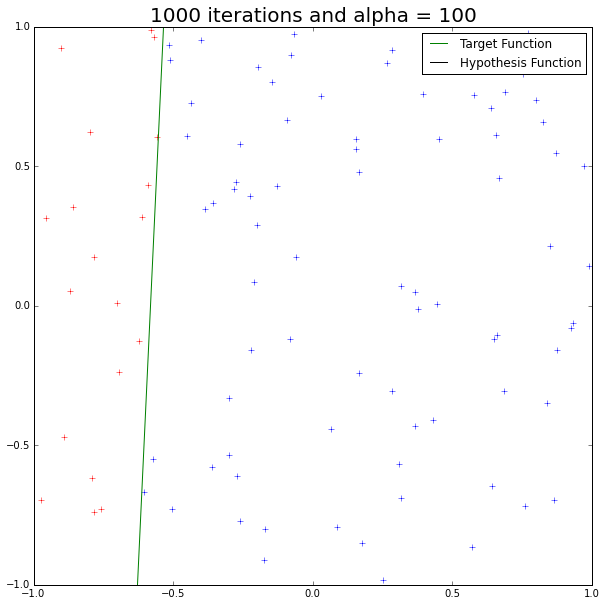

In [48]:
runningModifiedPerceptron(100)

Number of Iterations: 1000
Error: 0.8432


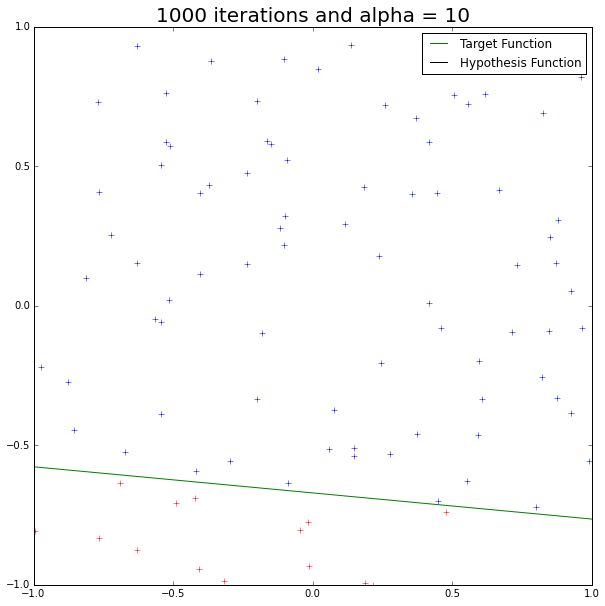

In [49]:
runningModifiedPerceptron(10)

Number of Iterations: 88
Error: 0.0069


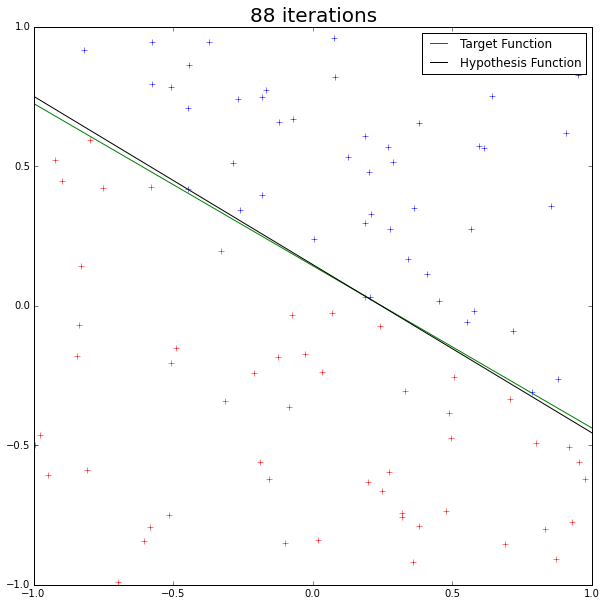

In [39]:
runningModifiedPerceptron(1)

Number of Iterations: 54
Error: 0.0312


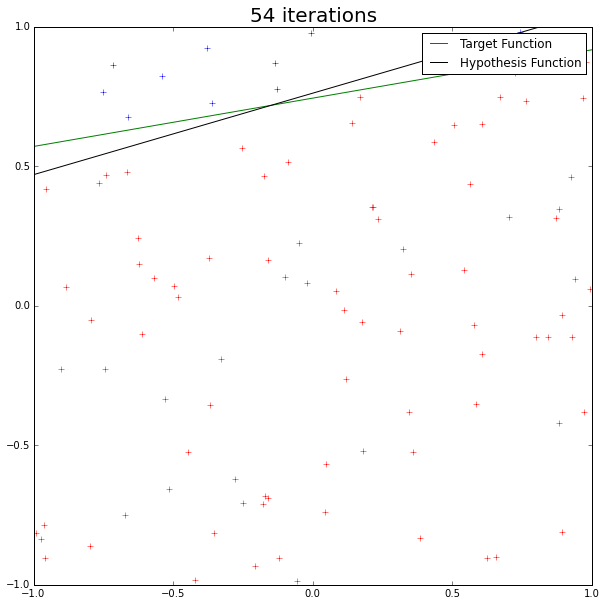

In [774]:
runningModifiedPerceptron(0.01)

Number of Iterations: 13
Error: 0.0238


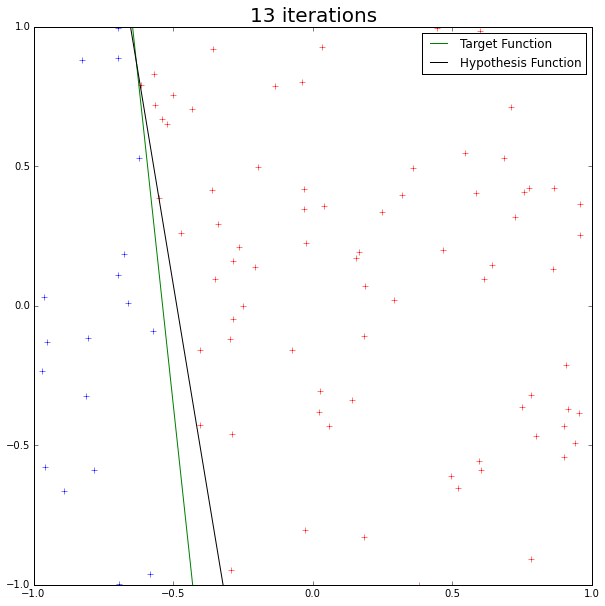

In [54]:
runningModifiedPerceptron(0.0001)